In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
df['PERDIDA_SEGUIMIENTO'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df = pd.DataFrame(df)

In [ ]:
numeric_columns.remove('ID')

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(drop_invariant=False, return_df=True) # Use ce.BinaryEncoder
encoder.fit(df[categoric_columns])

BinaryEncoder(cols=['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
                    'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
                    'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
                    'Consumidor_SPA', 'Desnutricion', 'Tabaquismo',
                    'Enf_Mental'],
              mapping=[{'col': 'SEXO',
                        'mapping':     SEXO_0  SEXO_1
 1       0       1
 2       1       0
-1       0       0
-2       0       0},
                       {'col': 'PERTENENCIA_ETNICA',
                        'mapping':     PERTENE...
                        'mapping':     CONDICION_VIH_0  CONDICION_VIH_1
 1                0                1
 2                1                0
 3                1                1
-1                0                0
-2                0                0},
                       {'col': 'Consumidor_SPA',
                        'mapping':     Consumidor_SPA_0  Consumidor_SPA_1
 1                 0                 1
 2                 1                 0
-1                 0                 0
-2                 0                 0},
                       {'col': 'Desnutricion',
                        'mapping':     Desnutricion_0  Desnutricion_1
 1               0               1
 2               1               0
-1               0               0
-2               0               0},
                       {'col': 'Tabaquismo',
                        'mapping':     Tabaquismo_0  Tabaquismo_1
 1             0             1
 2             1             0
-1             0             0
-2             0             0},
                       {'col': 'Enf_Mental',
                        'mapping':     Enf_Mental_0  Enf_Mental_1
 1             0             1
 2             1             0
-1             0             0
-2             0             0}])

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = encoder.transform(df[categoric_columns])
scaled_num = scaler.transform(df[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)

In [ ]:
# Avoid including 'PERDIDA_SEGUIMIENTO' twice during concatenation
df2 = pd.concat([scaled_num_df, encoded_cat, df[['PERDIDA_SEGUIMIENTO']]], axis=1)
# Alternatively, you could drop the duplicate column after concatenation:
df2 = pd.concat([df[['PERDIDA_SEGUIMIENTO']], scaled_num_df, encoded_cat], axis=1)
df2 = df2.loc[:,~df2.columns.duplicated()]

df3 = pd.concat([df[['ID','PERDIDA_SEGUIMIENTO']], scaled_num_df, encoded_cat], axis=1)
# Check if there's still a duplicate 'PERDIDA_SEGUIMIENTO' in df3
# If yes, then drop the duplicate:
# df3 = df3.loc[:,~df3.columns.duplicated()]
print(df2['PERDIDA_SEGUIMIENTO'].value_counts())

PERDIDA_SEGUIMIENTO
0    9364
1     738
Name: count, dtype: int64


In [ ]:
df2.shape

(10102, 37)

In [ ]:
print(df2.columns)

Index(['PERDIDA_SEGUIMIENTO', 'EDAD', 'SEXO_0', 'SEXO_1',
       'PERTENENCIA_ETNICA_0', 'PERTENENCIA_ETNICA_1', 'PERTENENCIA_ETNICA_2',
       'gp_desplaz_0', 'gp_desplaz_1', 'gp_migrant_0', 'gp_migrant_1',
       'gp_indigen_0', 'gp_indigen_1', 'LOC_RES_0', 'LOC_RES_1', 'LOC_RES_2',
       'REGIMEN_AFILIACION_0', 'REGIMEN_AFILIACION_1', 'REGIMEN_AFILIACION_2',
       'TIPO_TB_0', 'TIPO_TB_1', 'CONDICION_INGRESO_0', 'CONDICION_INGRESO_1',
       'CONDICION_INGRESO_2', 'RESULTADO_BK_RECOD_0', 'RESULTADO_BK_RECOD_1',
       'RESULTADO_BK_RECOD_2', 'CONDICION_VIH_0', 'CONDICION_VIH_1',
       'Consumidor_SPA_0', 'Consumidor_SPA_1', 'Desnutricion_0',
       'Desnutricion_1', 'Tabaquismo_0', 'Tabaquismo_1', 'Enf_Mental_0',
       'Enf_Mental_1'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop('PERDIDA_SEGUIMIENTO', axis=1)
y = df2['PERDIDA_SEGUIMIENTO']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
tratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
# Use the correct variable name 'tratified_splitter'
for train_index, test_index in tratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Original Class Distribution:
Class 0: 9364, Class 1: 738

Training Set Class Distribution:
Class 0: 5618, Class 1: 443

Validation Set Class Distribution:
Class 0: 1873, Class 1: 147

Test Set Class Distribution:
Class 0: 1873, Class 1: 148



In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
import time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score


## **SIN BALANCEO**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")
f1 = f1_score(y_test, y_pred)
print(f"f1: {f1}")
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"f2: {f2}")

Accuracy: 0.9158693500494887
recall: 0.10407239819004525
precision: 0.2875
f1: 0.15282392026578073
f2: 0.11929460580912864


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")
f1 = f1_score(y_test, y_pred)
print(f"f1: {f1}")
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"f2: {f2}")
cm1 = confusion_matrix(y_test, y_pred)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 score: 0.12953696788648245
Accuracy: 0.9148795776971297
recall: 0.15384615384615385
precision: 0.3238095238095238
f1: 0.2085889570552147
f2: 0.1718907987866532


Text(0.5, 427.9555555555555, 'Predicted label')

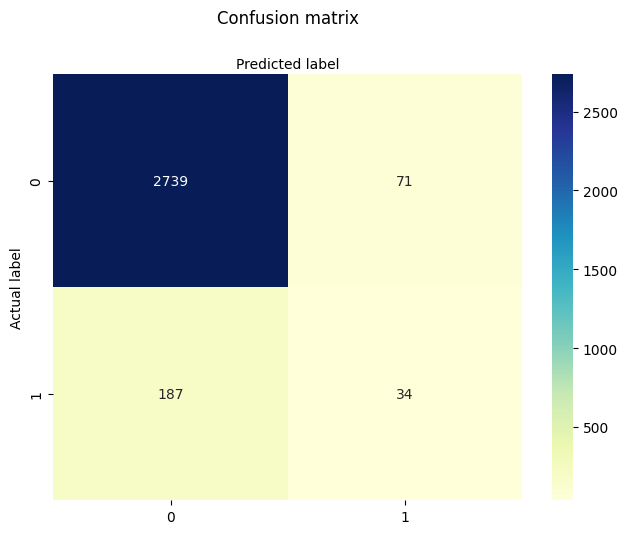

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall, precision, f1, accuracy, f2)]

model_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','F2-score'])
model_score.insert(0, 'XGBoost with ', 'None')
model_score

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
0,None,0.153846,0.32381,0.208589,0.91488,0.171891


In [ ]:
time_start = time.time()
np.int = int
best_model.fit(X_train, y_train)
time_model = time.time() - time_start
values_model  = [200, grid_search.best_score_, time_model]
results_model_none  = pd.DataFrame([values_model], columns=['n_estimators', 'best_score', 'time'])
results_model_none

,n_estimators,best_score,time
0,200,0.129537,0.348605


## **CON BALANCEO CLASES**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO', axis=1)
y = df2['PERDIDA_SEGUIMIENTO']

# Stratified split
X_train_x, X_val_x, y_train_x, y_val_x = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_x, X_test_x, y_val_x, y_test_x = train_test_split(X_val_x, y_val_x, test_size=0.5, stratify=y_val_x, random_state=42)

In [ ]:
ratio = float(y_train_x.value_counts()[0]) / y_train_x.value_counts()[1]

In [ ]:
import xgboost as xgb
modelXGB = xgb.XGBClassifier(scale_pos_weight=ratio)
modelXGB.fit(X_train_x, y_train_x)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('No perdida:', np.sum(y_train_x == 0), '/', round(np.sum(y_train_x == 0)/len(y_train_x) * 100,2), '% of the dataset')
print('Perdida:', np.sum(y_train_x == 1), '/',round(np.sum(y_train_x == 1)/len(y_train_x) * 100,2), '% of the dataset')

No perdida: 5618 / 92.69 % of the dataset
Perdida: 443 / 7.31 % of the dataset


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import classification_report

y_pred_XG = modelXGB.predict(X_test_x)
y_pred_proba_XG = modelXGB.predict_proba(X_test_x)[:, 1]
cm2 = confusion_matrix(y_test_x, y_pred_XG)

XGBoost_Recall = recall_score(y_test_x, y_pred_XG)
XGBoost_Precision = precision_score(y_test_x, y_pred_XG)
XGBoost_f1 = f1_score(y_test_x, y_pred_XG)
XGBoost_accuracy = accuracy_score(y_test_x, y_pred_XG)
XGBoost_beta_score = fbeta_score(y_test_x, y_pred_XG, beta=2, average='binary')
print(cm2)

[[1653  220]
 [  98   50]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [float(y_train_x.value_counts()[0]) / y_train_x.value_counts()[1]]  # Keep scale_pos_weight fixed
}

# Create a GridSearchCV object
grid_search_cw = GridSearchCV(estimator=modelXGB, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cw.fit(X_train_x, y_train_x)

# Print the best parameters and score
print("Best parameters:", grid_search_cw.best_params_)
print("Best F1 score:", grid_search_cw.best_score_)

# Use the best model for predictions
best_model_balanced = grid_search_cw.best_estimator_
y_pred_balanced = best_model_balanced.predict(X_test_x)

# Evaluate the best model
accuracy_balanced = accuracy_score(y_test_x, y_pred_balanced)
print(f"Accuracy (Balanced): {accuracy_balanced}")
recall_balanced = recall_score(y_test_x, y_pred_balanced)
print(f"Recall (Balanced): {recall_balanced}")
precision_balanced = precision_score(y_test_x, y_pred_balanced)
print(f"Precision (Balanced): {precision_balanced}")
f1_balanced = f1_score(y_test_x, y_pred_balanced)
print(f"F1 Score (Balanced): {f1_balanced}")
f2_balanced = fbeta_score(y_test_x, y_pred_balanced, beta=2)
print(f"F2 Score (Balanced): {f2_balanced}")

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 12.681715575620768, 'subsample': 1.0}
Best F1 score: 0.6706588355464759
Accuracy (Balanced): 0.6996536368134587
Recall (Balanced): 0.6283783783783784
Precision (Balanced): 0.14418604651162792
F1 Score (Balanced): 0.23455233291298866
F2 Score (Balanced): 0.375909458367017


In [ ]:
cm3 = confusion_matrix(y_test_x, y_pred_balanced)

Text(0.5, 427.9555555555555, 'Predicted label')

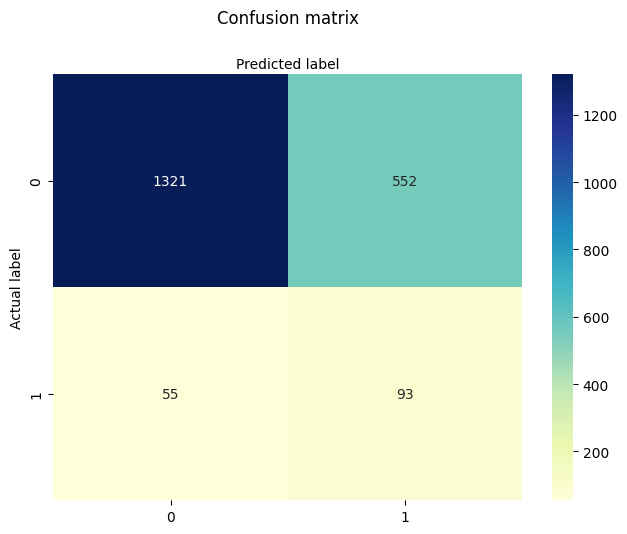

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
ndf = [(recall_balanced, precision_balanced , f1_balanced, accuracy_balanced, f2_balanced)]

XGBoost_score_cw = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','F2-score'])
XGBoost_score_cw.insert(0, 'XGBoost with ', 'Class weights')
XGBoost_score_cw

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
0,Class weights,0.628378,0.144186,0.234552,0.699654,0.375909


In [ ]:
# prompt: contabilizarl el tiempo de computo para el entrenamiento del modelo best_model_balanced

import time

time_start = time.time()
best_model_balanced.fit(X_train_x, y_train_x)
time_model = time.time() - time_start
values_best_model_balanced  = [50, grid_search_cw.best_score_, best_model_balanced]
results_best_model_balanced  = pd.DataFrame([values_best_model_balanced], columns=['n_estimators', 'best_score', 'time'])
results_best_model_balanced
print(f"Training time for best_model_balanced: {time_model:.4f} seconds")


Training time for best_model_balanced: 0.9763 seconds


## **XG Boost Undersampling**

Best parameters (Undersampling): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 score (Undersampling): 0.6772216547497446
Accuracy (Undersampled): 0.6496783770410688
Recall (Undersampled): 0.668918918918919
Precision (Undersampled): 0.13060686015831136
F1 Score (Undersampled): 0.2185430463576159
F2 Score (Undersampled): 0.36666666666666664


Text(0.5, 427.9555555555555, 'Predicted label')

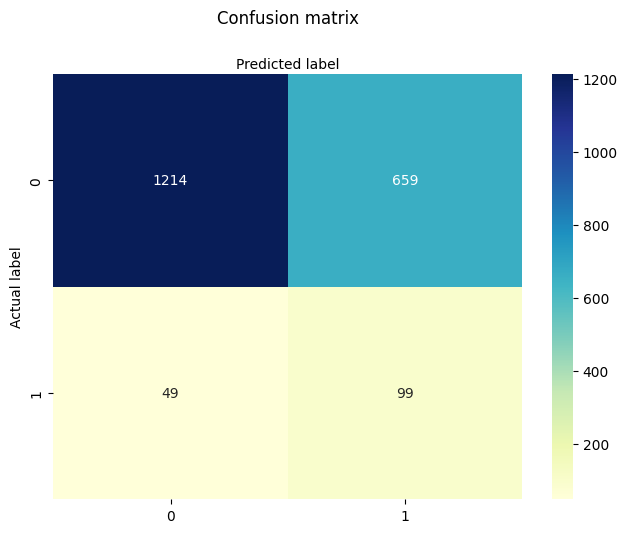

In [ ]:
# prompt: generar un modelo XGboost con undersampling a partir del data set X y y con optimizacion de hiperparametros con gridsearch

from imblearn.under_sampling import RandomUnderSampler

X = df2.drop('PERDIDA_SEGUIMIENTO', axis=1)
y = df2['PERDIDA_SEGUIMIENTO']

# Stratified split
X_train_u, X_val_u, y_train_u, y_val_u = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_u, X_test_u, y_val_u, y_test_u = train_test_split(X_val_u, y_val_u, test_size=0.5, stratify=y_val_u, random_state=42)

# Apply RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled_u, y_train_resampled_u = undersampler.fit_resample(X_train_u, y_train_u)

# Create an XGBoost classifier
modelXGB_u = xgb.XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a GridSearchCV object
grid_search_u = GridSearchCV(estimator=modelXGB_u, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search_u.fit(X_train_resampled_u, y_train_resampled_u)

# Print the best parameters and score
print("Best parameters (Undersampling):", grid_search_u.best_params_)
print("Best F1 score (Undersampling):", grid_search_u.best_score_)

# Use the best model for predictions
best_model_undersampled = grid_search_u.best_estimator_
y_pred_undersampled = best_model_undersampled.predict(X_test_u)

# Evaluate the best model
accuracy_undersampled = accuracy_score(y_test_u, y_pred_undersampled)
print(f"Accuracy (Undersampled): {accuracy_undersampled}")
recall_undersampled = recall_score(y_test_u, y_pred_undersampled)
print(f"Recall (Undersampled): {recall_undersampled}")
precision_undersampled = precision_score(y_test_u, y_pred_undersampled)
print(f"Precision (Undersampled): {precision_undersampled}")
f1_undersampled = f1_score(y_test_u, y_pred_undersampled)
print(f"F1 Score (Undersampled): {f1_undersampled}")
f2_undersampled = fbeta_score(y_test_u, y_pred_undersampled, beta=2)
print(f"F2 Score (Undersampled): {f2_undersampled}")

cm2 = confusion_matrix(y_test_u, y_pred_undersampled)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall_undersampled, precision_undersampled, f1_undersampled, accuracy_undersampled, f2_undersampled)]

XGBoost_score_us = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','F2-score'])
XGBoost_score_us.insert(0, 'XGBoost with ', 'Undersampling')
XGBoost_score_us

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
0,Undersampling,0.668919,0.130607,0.218543,0.649678,0.366667


In [ ]:
time_start = time.time()
best_model_undersampled.fit(X_train_resampled_u, y_train_resampled_u)
time_model = time.time() - time_start
values_best_model_undersampled  = [200, grid_search_u.best_score_, time_model]
results_best_model_undersampled  = pd.DataFrame([values_best_model_undersampled], columns=['n_estimators', 'best_score', 'time'])
results_best_model_undersampled
print(f"Training time for best_model_undersampled: {time_model:.4f} seconds")

Training time for best_model_undersampled: 0.1466 seconds


## **XGBOOST OVERSAMPLING**

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 score: 0.9976857236114501
Accuracy (Oversampled): 0.8723088344469191
Recall (Oversampled): 0.22372881355932203
Precision (Oversampled): 0.18696883852691218
F1 Score (Oversampled): 0.2037037037037037
F2 Score (Oversampled): 0.21526418786692758


Text(0.5, 427.9555555555555, 'Predicted label')

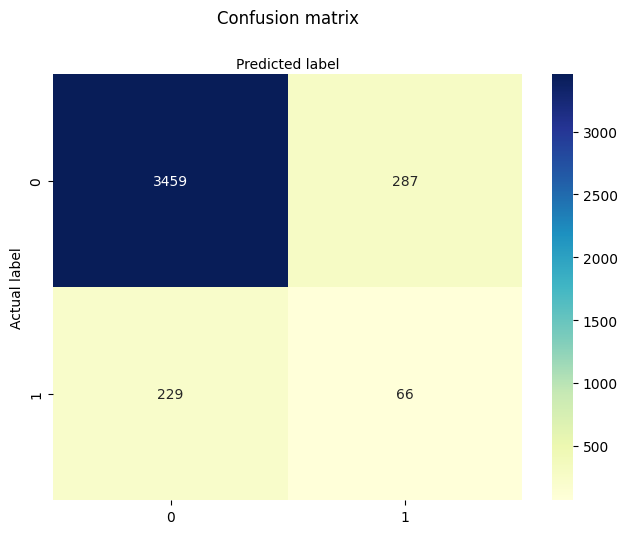

In [ ]:
# prompt: generar un modelo XGboost con oversampling a partir del data set X y y con optimizacion de hiperparametros con gridsearch

from imblearn.over_sampling import RandomOverSampler

# Split data into training and testing sets
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_os, y_train_os = oversampler.fit_resample(X_train_os, y_train_os)

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
model_over_xg = xgb.XGBClassifier()

# Create a GridSearchCV object
grid_search_over_xg = GridSearchCV(estimator=model_over_xg, param_grid=param_grid,
                                 scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the oversampled training data
grid_search_over_xg.fit(X_train_os, y_train_os)

# Print the best parameters and score
print("Best parameters:", grid_search_over_xg.best_params_)
print("Best F1 score:", grid_search_over_xg.best_score_)

# Use the best model for predictions
best_model_over_xg = grid_search_over_xg.best_estimator_
y_pred_over_xg = best_model_over_xg.predict(X_test_os)

# Evaluate the best model
accuracy_over_xg = accuracy_score(y_test_os, y_pred_over_xg)
print(f"Accuracy (Oversampled): {accuracy_over_xg}")
recall_over_xg = recall_score(y_test_os, y_pred_over_xg)
print(f"Recall (Oversampled): {recall_over_xg}")
precision_over_xg = precision_score(y_test_os, y_pred_over_xg)
print(f"Precision (Oversampled): {precision_over_xg}")
f1_over_xg = f1_score(y_test_os, y_pred_over_xg)
print(f"F1 Score (Oversampled): {f1_over_xg}")
f2_over_xg = fbeta_score(y_test_os, y_pred_over_xg, beta=2)
print(f"F2 Score (Oversampled): {f2_over_xg}")

cm5 = confusion_matrix(y_test_os, y_pred_over_xg)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall_over_xg, precision_over_xg , f1_over_xg, accuracy_over_xg, f2_over_xg)]

XGBoost_score_over = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','F2-score'])
XGBoost_score_over.insert(0, 'XGBoost with ', 'Oversampling')
XGBoost_score_over

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
0,Oversampling,0.223729,0.186969,0.203704,0.872309,0.215264


In [ ]:
time_start = time.time()
np.int = int
grid_search_over_xg.fit(X_train_os, y_train_os)
time_over_xgu = time.time() - time_start
values_over_xgu = [200, grid_search_over_xg.best_score_, time_over_xgu]
results_over_xgu = pd.DataFrame([values_over_xgu], columns=['n_estimators', 'best_score', 'time'])
results_over_xgu

,n_estimators,best_score,time
0,200,0.997686,142.579577


## **XG BOOST + SMOTE**

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 score: 0.8960473819807773
Accuracy (SMOTE + Undersampling): 0.8864142538975501
Recall (SMOTE + Undersampling): 0.21016949152542372
Precision (SMOTE + Undersampling): 0.2152777777777778
F1 Score (SMOTE + Undersampling): 0.21269296740994853
F2 Score (SMOTE + Undersampling): 0.2111716621253406


Text(0.5, 427.9555555555555, 'Predicted label')

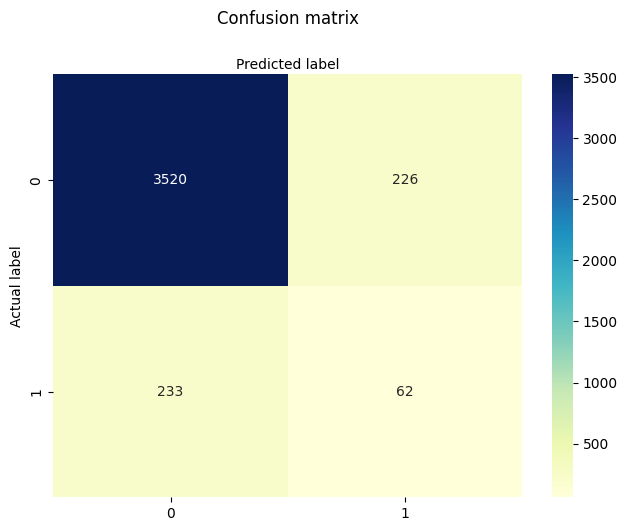

In [ ]:
# prompt: generar un modelo XGboost con SMOTE + undersampling a partir del data set X y y con optimizacion de hiperparametros con gridsearch

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Create a pipeline with SMOTE and undersampling
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
])

# Apply SMOTE and undersampling to the training data
X_train_smote, y_train_smote = pipeline.fit_resample(X_train_smote, y_train_smote)

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
model_smote_xg = xgb.XGBClassifier()

# Create a GridSearchCV object
grid_search_smote_xg = GridSearchCV(estimator=model_smote_xg, param_grid=param_grid,
                                 scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the SMOTE + Undersampling training data
grid_search_smote_xg.fit(X_train_smote, y_train_smote)

# Print the best parameters and score
print("Best parameters:", grid_search_smote_xg.best_params_)
print("Best F1 score:", grid_search_smote_xg.best_score_)

# Use the best model for predictions
best_model_smote_xg = grid_search_smote_xg.best_estimator_
y_pred_smote_xg = best_model_smote_xg.predict(X_test_smote)

# Evaluate the best model
accuracy_smote_xg = accuracy_score(y_test_smote, y_pred_smote_xg)
print(f"Accuracy (SMOTE + Undersampling): {accuracy_smote_xg}")
recall_smote_xg = recall_score(y_test_smote, y_pred_smote_xg)
print(f"Recall (SMOTE + Undersampling): {recall_smote_xg}")
precision_smote_xg = precision_score(y_test_smote, y_pred_smote_xg)
print(f"Precision (SMOTE + Undersampling): {precision_smote_xg}")
f1_smote_xg = f1_score(y_test_smote, y_pred_smote_xg)
print(f"F1 Score (SMOTE + Undersampling): {f1_smote_xg}")
f2_smote_xg = fbeta_score(y_test_smote, y_pred_smote_xg, beta=2)
print(f"F2 Score (SMOTE + Undersampling): {f2_smote_xg}")

cm6 = confusion_matrix(y_test_smote, y_pred_smote_xg)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall_smote_xg, precision_smote_xg , f1_smote_xg, accuracy_smote_xg, f2_smote_xg)]

XGBoost_score_smote = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','F2-score'])
XGBoost_score_smote.insert(0, 'XGBoost with ', 'SMOTE + Undersampling')
XGBoost_score_smote

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
0,SMOTE + Undersampling,0.210169,0.215278,0.212693,0.886414,0.211172


In [ ]:
time_start = time.time()
np.int = int
grid_search_smote_xg.fit(X_train_smote, y_train_smote)
time_smote_xgu = time.time() - time_start
values_smote_xgu = [200, grid_search_smote_xg.best_score_, time_smote_xgu]
results_smote_xgu = pd.DataFrame([values_smote_xgu], columns=['n_estimators', 'best_score', 'time'])
results_smote_xgu

,n_estimators,best_score,time
0,200,0.896047,144.357995


## **Comparacion metricas**

In [ ]:
predictions = pd.concat([model_score, XGBoost_score_cw, XGBoost_score_us, XGBoost_score_over, XGBoost_score_smote], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
2,Undersampling,0.668919,0.130607,0.218543,0.649678,0.366667
1,Class weights,0.628378,0.144186,0.234552,0.699654,0.375909
3,Oversampling,0.223729,0.186969,0.203704,0.872309,0.215264
4,SMOTE + Undersampling,0.210169,0.215278,0.212693,0.886414,0.211172
0,None,0.153846,0.323810,0.208589,0.914880,0.171891


## **Comparacion tiempos**

In [ ]:
results_model_none.loc[results_model_none['time'] == results_model_none.loc[0, 'time'], 'time'] = 0
results_combined = pd.concat([results_model_none, results_best_model_undersampled, results_over_xgu, results_smote_xgu], ignore_index=True)
results_combined.index = ['No Under/Oversampling','XG Under', 'XG Oversampling', 'XG SMOTE + Undersampling']
results_combined.sort_values(by=['time'], ascending=True)

,n_estimators,best_score,time
No Under/Oversampling,200,0.129537,0.000000
XG Under,200,0.677222,0.146550
XG Oversampling,200,0.997686,142.579577
XG SMOTE + Undersampling,200,0.896047,144.357995
